# **Import Library**

In [ ]:
from google.colab import drive
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
np.random.seed(123)

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data_sentimen = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/riset informatika/cyberbullyingData.xlsx')
data_sentimen.head(5)

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN


# **Preprocessing Data**

In [ ]:
def clean_text(text):
    import string
    import re

    # Menghapus tanda baca dengan mengganti dengan string kosong
    for sp in string.punctuation:
        text = text.replace(sp, "")

    # Menghilangkan angka
    text = re.sub(r"\d+", "", text)

    # Menggantikan spasi berlebih dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    return text

data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(clean_text)

data_sentimen.head(5)

In [ ]:
import re

# Daftar kata-kata penghenti
sw = ["bacod", "cokk", "anjirrr", "anjeng", "anjir", "anying", "anjay", "kolot", "tolol"]

def remove_stopwords(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Memecah teks menjadi kata-kata
    words = text.split()

    # Menghilangkan kata-kata penghenti
    words = [word for word in words if word not in sw]

    # Menggabungkan kata-kata yang tersisa
    text = ' '.join(words)

    # Menghilangkan bentuk repetitif dari kata-kata
    text = re.sub(r'(.+?)\1+', r'\1', text)

    return text

data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(remove_stopwords)

data_sentimen.head(5)

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
data= stop_factory.get_stop_words()
stopword = stop_factory.create_stop_word_remover()
data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(lambda x: stopword.remove(x))
data_sentimen

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,ka tidur udah pagi gaboleh capek,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,makan nasi padang aja begini badanya,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,aku suka dia selalu cukur jembut mangung,Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,hai kak isyana aku ngefans banget sama kak isy...,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,manusia apa bidari sih heran deh cantik terus 😌♥️,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,aku memutuskan menjadi fans isyana gila keren ...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,amzing isyana jur aku amazed banget skil minat...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,paling ngiri liat orang keren maen alat musik ...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,sampe ga berkata buat isyana sangat sempurna org,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengaplikasikan stemmer ke kolom 'Komentar'
data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [ ]:
data_sentimen

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,ka tidur udah pagi gaboleh capek,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,makan nasi padang aja begini bada,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,aku suka dia selalu cukur jembut mangung,Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,hai kak isyana aku ngefans banget sama kak isy...,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,manusia apa bidari sih heran deh cantik terus,Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,aku putus jadi fans isyana gila keren banget o...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,amzing isyana jur aku amazed banget skil minat...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,paling ngiri liat orang keren maen alat musik ...,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,sampe ga kata buat isyana sangat sempurna org,Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


Counter({'Non-bullying': 325, 'Bullying': 325})


<Axes: xlabel='Kategori', ylabel='count'>

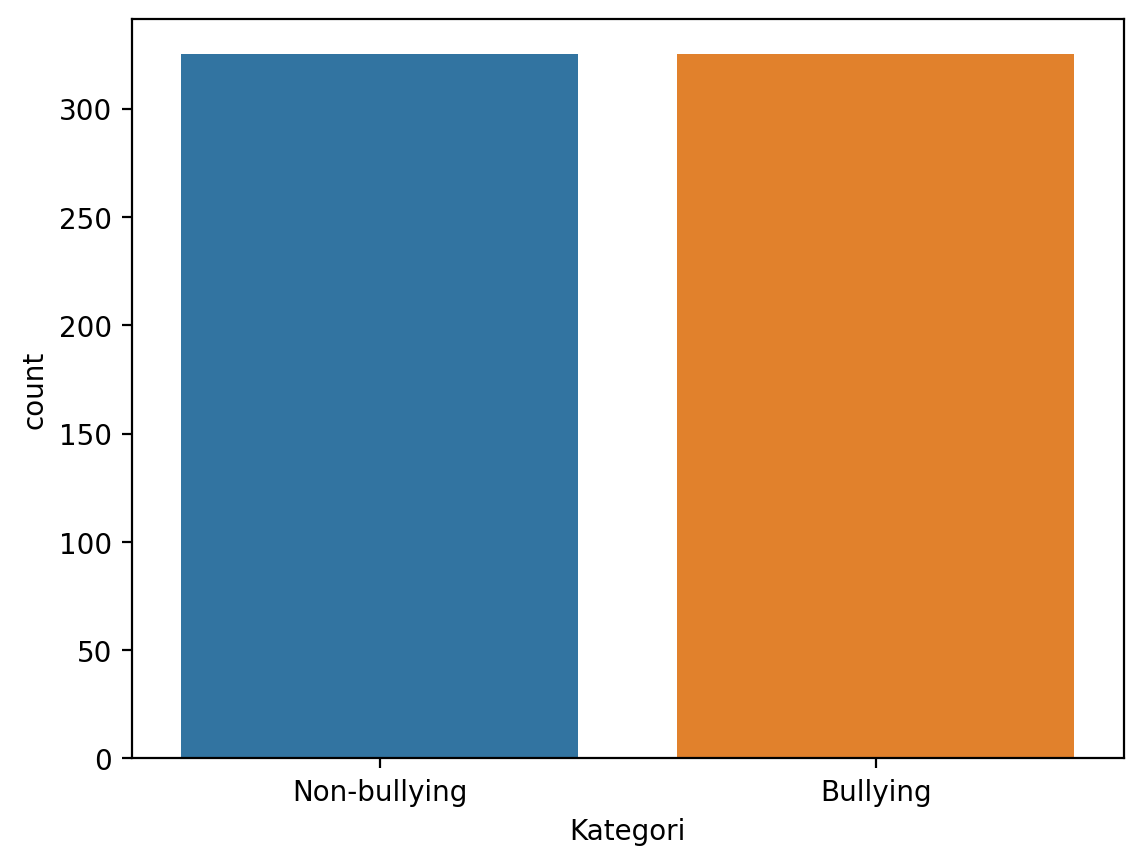

In [ ]:
x = data_sentimen.Komentar
y = data_sentimen.Kategori

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
Bullying= " ".join(review for review in data_sentimen[data_sentimen['Kategori'] == 'Bullying'].Komentar)
Non_Bullying= " ".join(review for review in data_sentimen[data_sentimen['Kategori'] == 'Non-bullying'].Komentar)
stopwords = set(STOPWORDS)
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off");

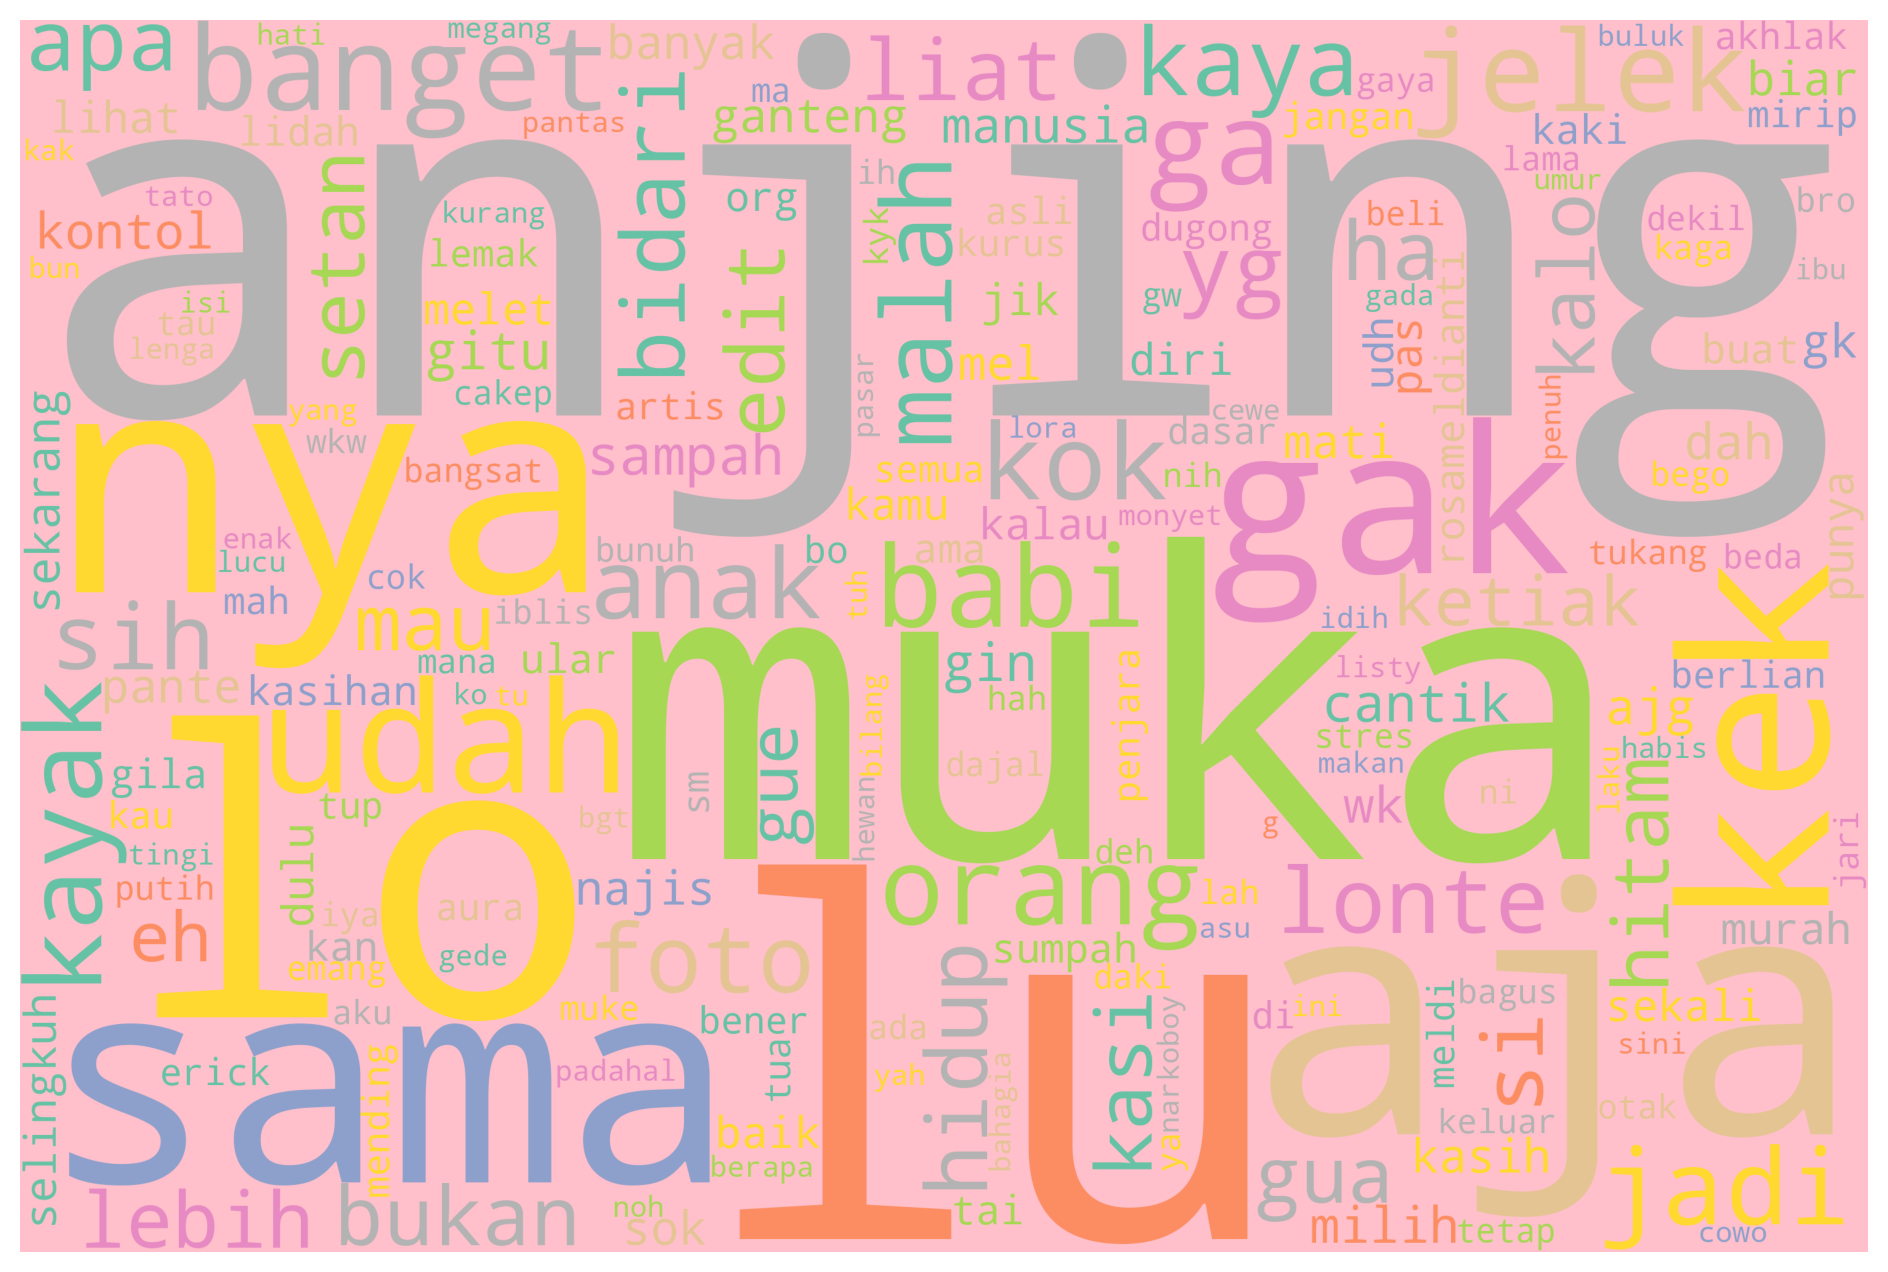

In [ ]:
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='pink', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(Bullying)
plot_cloud(wordcloud1)

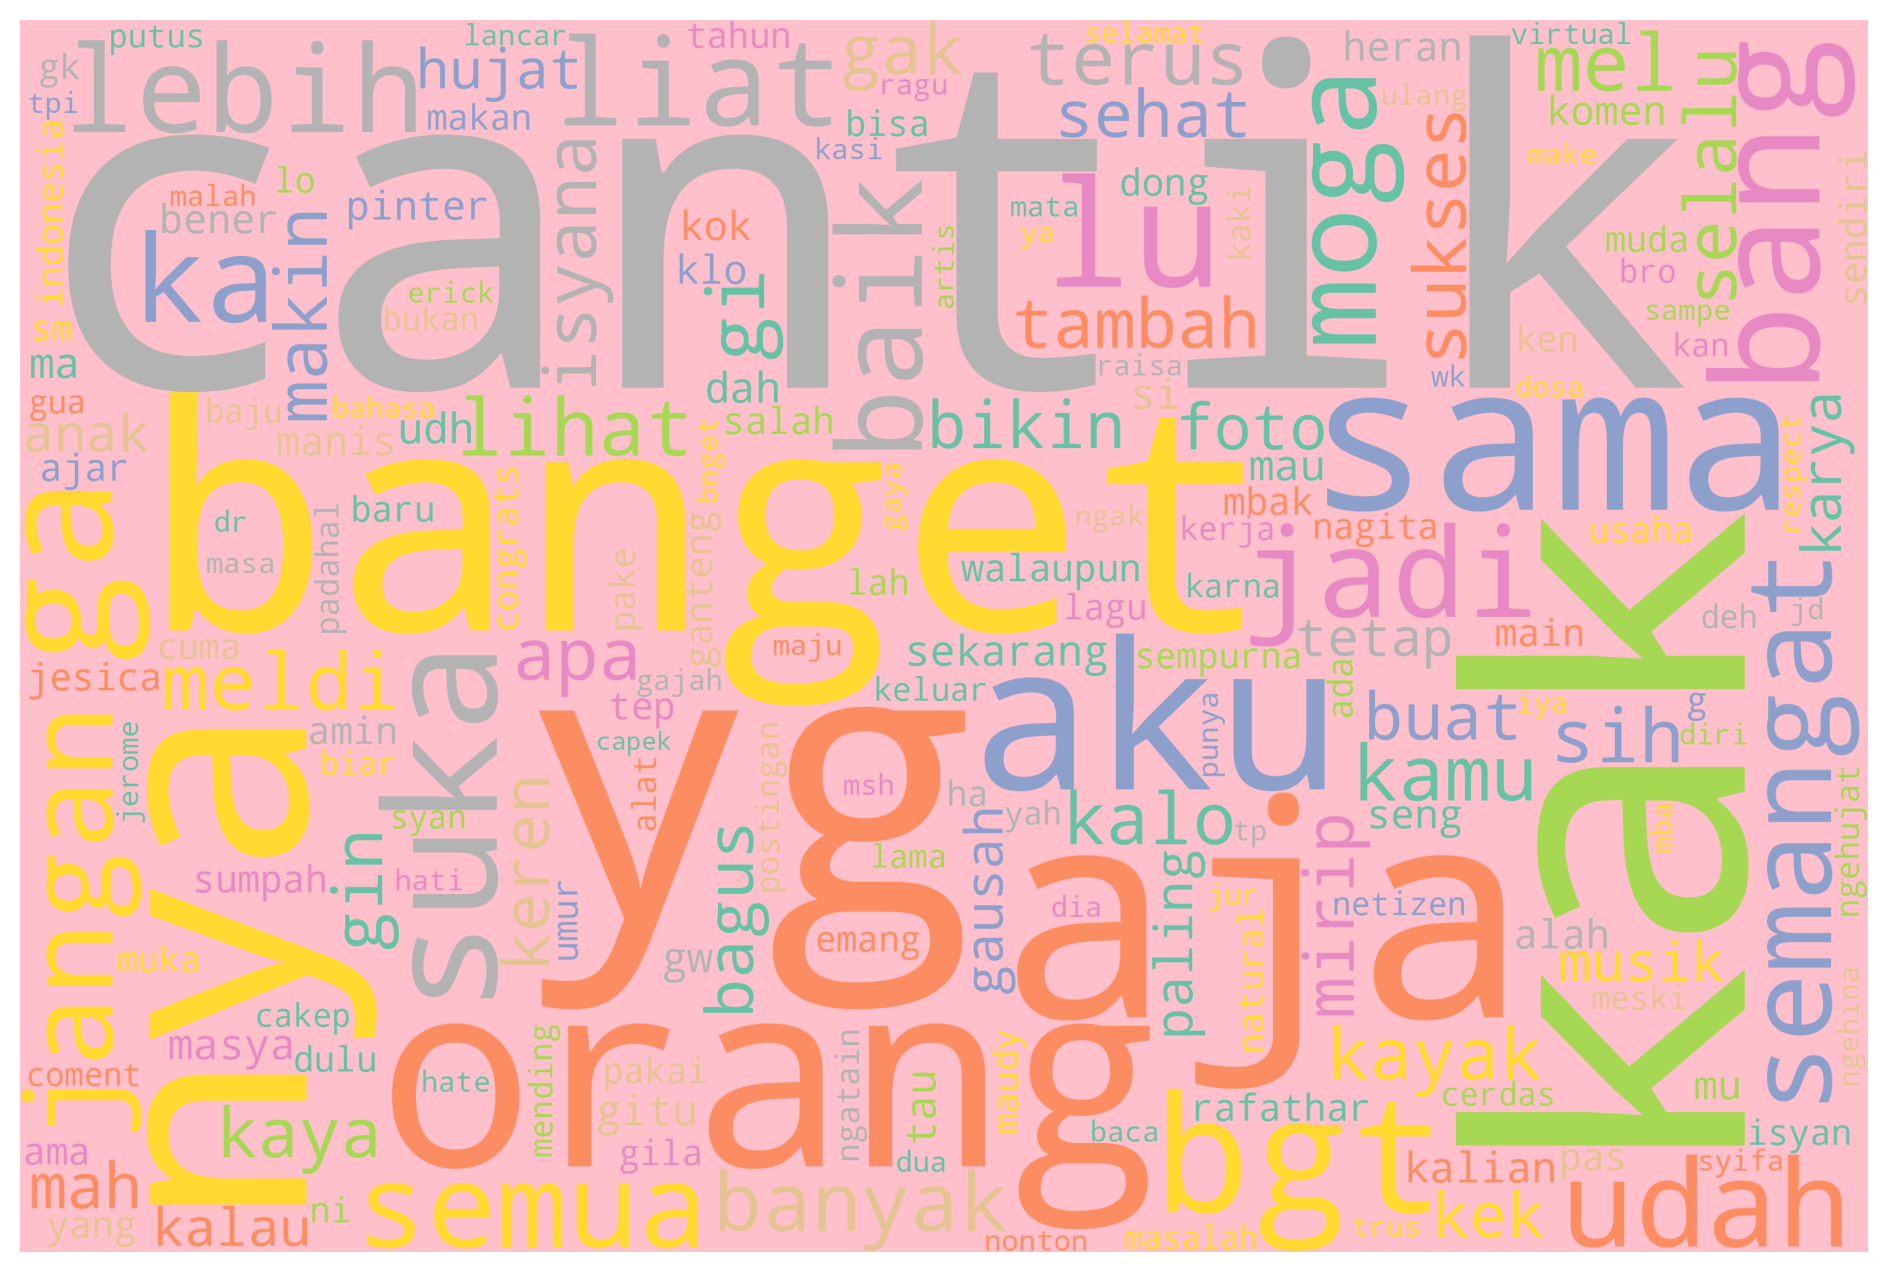

In [ ]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='pink', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(Non_Bullying)
plot_cloud(wordcloud2)

In [ ]:
# replace label pada dataset
data_sentimen.Kategori.replace("Bullying", 0 , inplace = True)
data_sentimen.Kategori.replace("Non-bullying", 1 , inplace = True)
data_sentimen.head(10)

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,ka tidur udah pagi gaboleh capek,1,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,makan nasi padang aja begini bada,1,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,aku suka dia selalu cukur jembut mangung,0,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,hai kak isyana aku ngefans banget sama kak isy...,1,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,manusia apa bidari sih heran deh cantik terus,1,14 Oktober 2019,@isyanasarasvati,NaN,NaN
5,6,@e.fril,ayukinanti isyan skrg ubah baju nya nakal,0,14 Oktober 2019,@isyanasarasvati,NaN,NaN
6,7,@bahasa.bayi.planet,gemesnya isyan kayak tango lap cia,1,16 September 2019,@isyanasarasvati,NaN,NaN
7,8,@khanayarudinita,makin jelek aja anak padahal ibu ayah cakep,0,22 Juni 2019,@tasyakamila,NaN,NaN
8,9,@reniaulia225,kok anak kayak udah tua gitu muka k tasya,0,22 Juni 2019,@tasyakamila,NaN,NaN
9,10,@nurjanah.hani,muka anak nya ko tua banget gk ngemesin gk lucu,0,22 Juni 2019,@tasyakamila,NaN,NaN


# **TF-IDF**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_sentimen['Komentar'],data_sentimen['Kategori'],test_size=0.3)

In [ ]:
Count_vect = CountVectorizer(max_features=5000)
Count_vect.fit(data_sentimen['Komentar'])
Train_X_Count = Count_vect.transform(Train_X)
Test_X_Count = Count_vect.transform(Test_X)

# **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
parameters_linear = {
    "C": [0.1, 1, 10]
}

parameters_rbf = {
    "C": [0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}

parameters_poly = {
    "C": [0.1, 1, 10],
    "degree": [2, 3, 4, 5],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}

# Define the models
model_linear = svm.SVC(kernel="linear")
model_rbf = svm.SVC(kernel="rbf")
model_poly = svm.SVC(kernel="poly")

# Perform grid search
grid_search_linear = GridSearchCV(model_linear, parameters_linear, cv=10)
grid_search_rbf = GridSearchCV(model_rbf, parameters_rbf, cv=10)
grid_search_poly = GridSearchCV(model_poly, parameters_poly, cv=10)

# Fit the models
grid_search_linear.fit(Train_X_Count,Train_Y)
grid_search_rbf.fit(Train_X_Count,Train_Y)
grid_search_poly.fit(Train_X_Count,Train_Y)

# Print the best parameters
print("Kernel linear:", grid_search_linear.best_params_)
print("Kernel RBF:", grid_search_rbf.best_params_)
print("Kernel polynomial:", grid_search_poly.best_params_)

Kernel linear: {'C': 0.1}
Kernel RBF: {'C': 10, 'gamma': 0.01}
Kernel polynomial: {'C': 0.1, 'degree': 2, 'gamma': 10}


# **SVM & Confussion Matrix**

In [ ]:
#SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Count)
predictions_SVM_t = SVM.predict(Train_X_Count)
#Nilai akurasi
print("SVM Accuracy Score Training-> ",accuracy_score(predictions_SVM_t, Train_Y)*100)
print("SVM Accuracy Score Testing-> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score Training->  100.0
SVM Accuracy Score Testing->  79.48717948717949


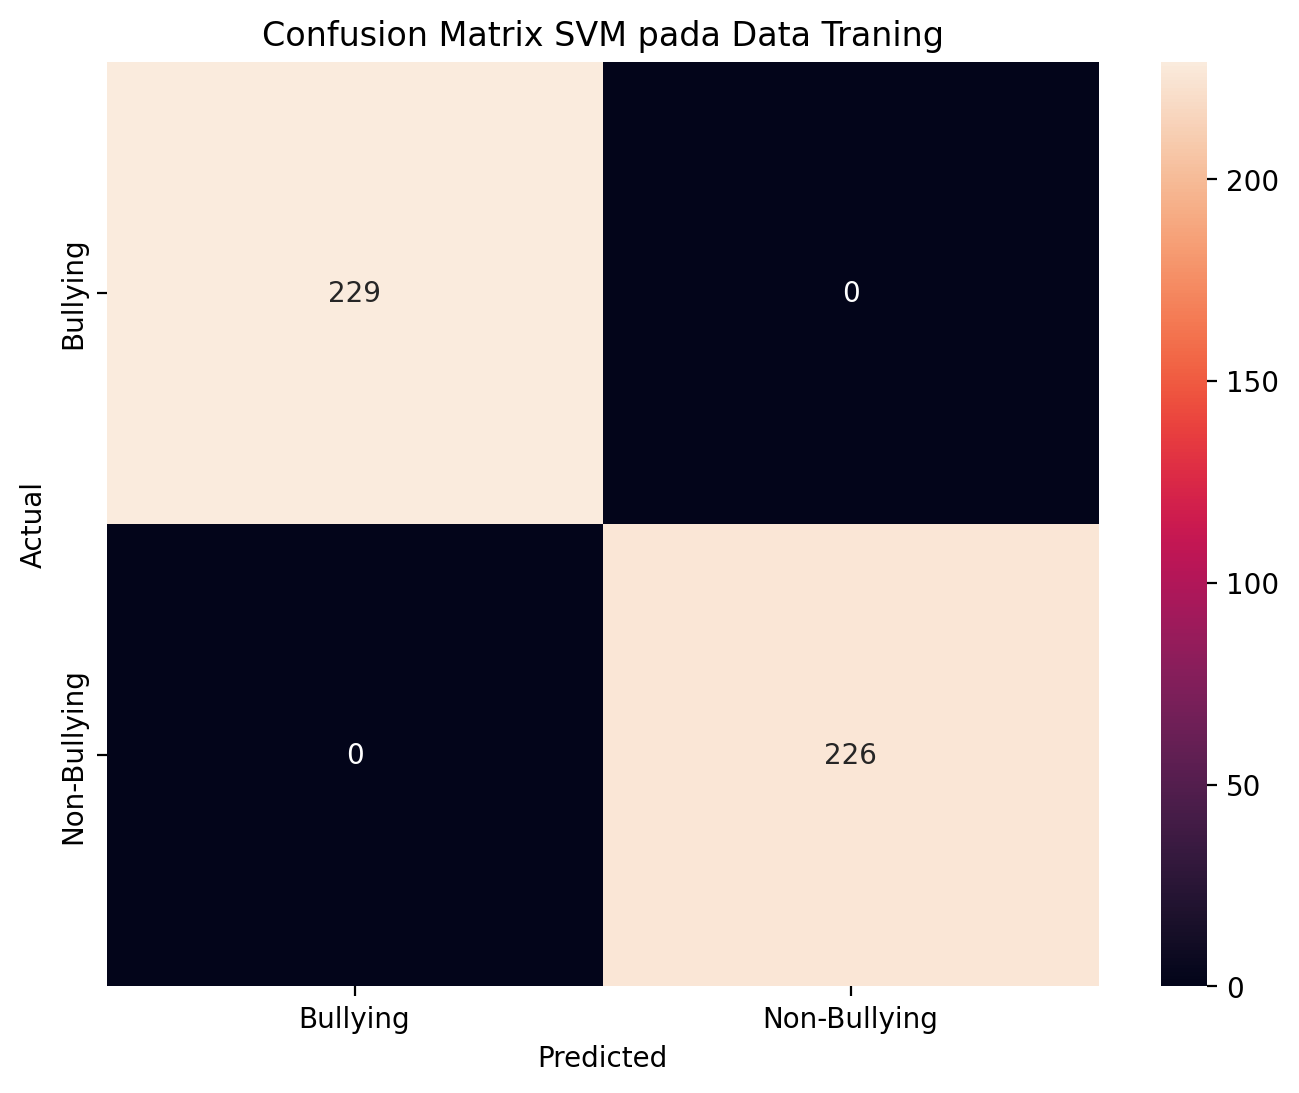

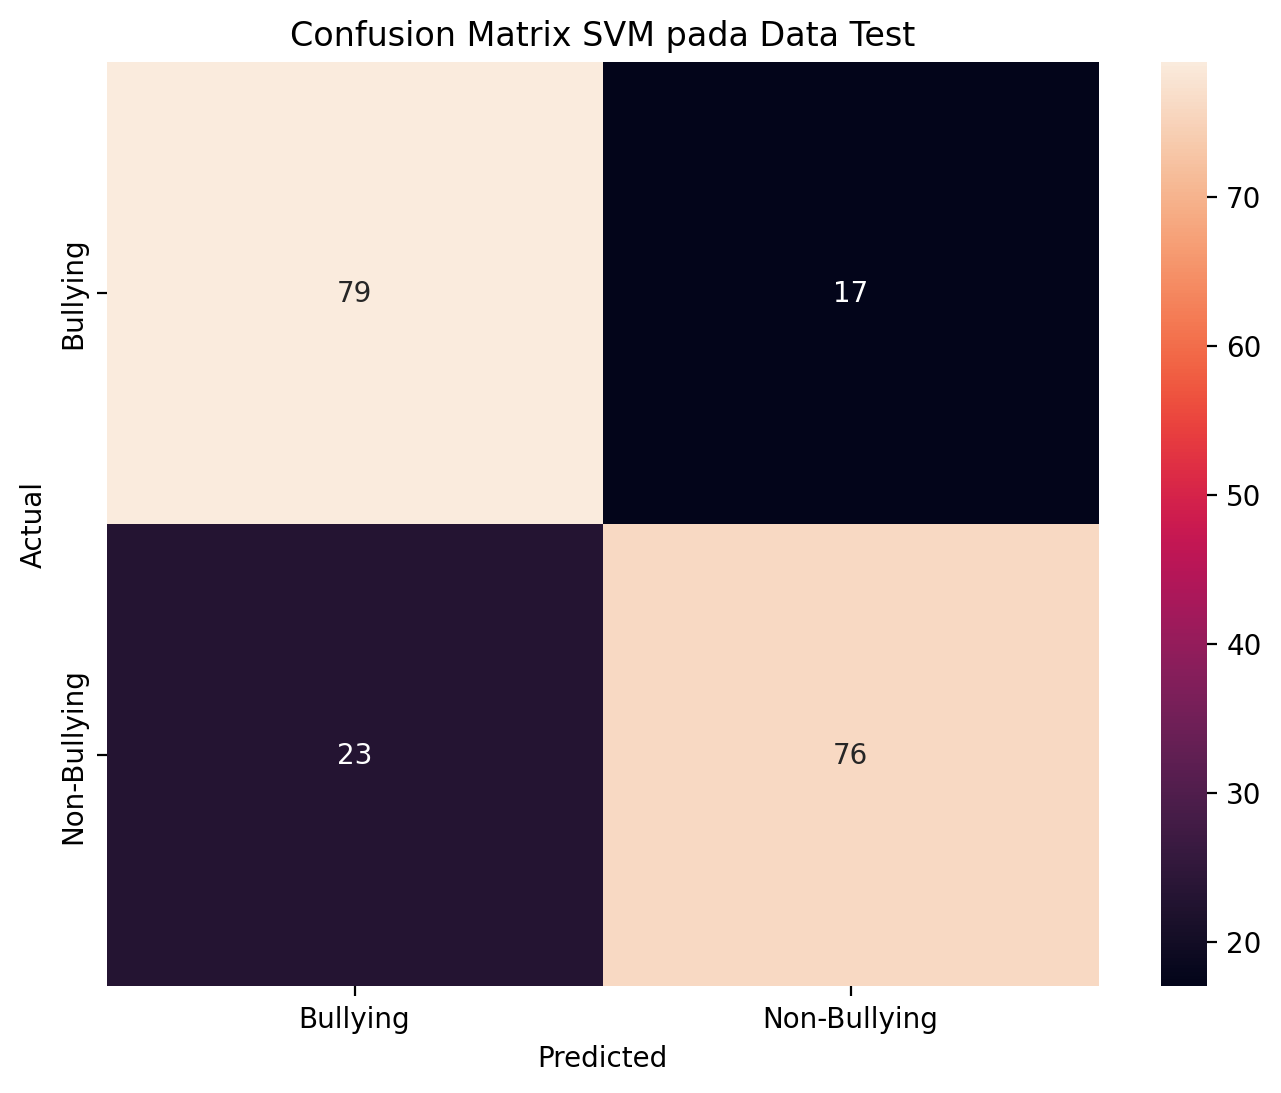

In [ ]:
# Confusion matrix SVM pada data train
conf_matSVM_t = confusion_matrix(Train_Y, predictions_SVM_t)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matSVM = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report SVM pada data training
print("klasifikasi report SVM pada data training")
print(" ")
print(classification_report(Train_Y, predictions_SVM_t))

print(" ")
print(" ")

#klasifikasi report SVM pada data testing
print("klasifikasi report SVM pada data testing")
print(" ")
print(classification_report(Test_Y, predictions_SVM))

klasifikasi report SVM pada data training
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       226

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

 
 
klasifikasi report SVM pada data testing
 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.82      0.77      0.79        99

    accuracy                           0.79       195
   macro avg       0.80      0.80      0.79       195
weighted avg       0.80      0.79      0.79       195



In [ ]:
#SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=10, kernel='rbf', gamma=0.001)
SVM.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Count)
predictions_SVM_t = SVM.predict(Train_X_Count)
#Nilai akurasi
print("SVM Accuracy Score Training-> ",accuracy_score(predictions_SVM_t, Train_Y)*100)
print("SVM Accuracy Score Testing-> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score Training->  92.74725274725274
SVM Accuracy Score Testing->  79.48717948717949


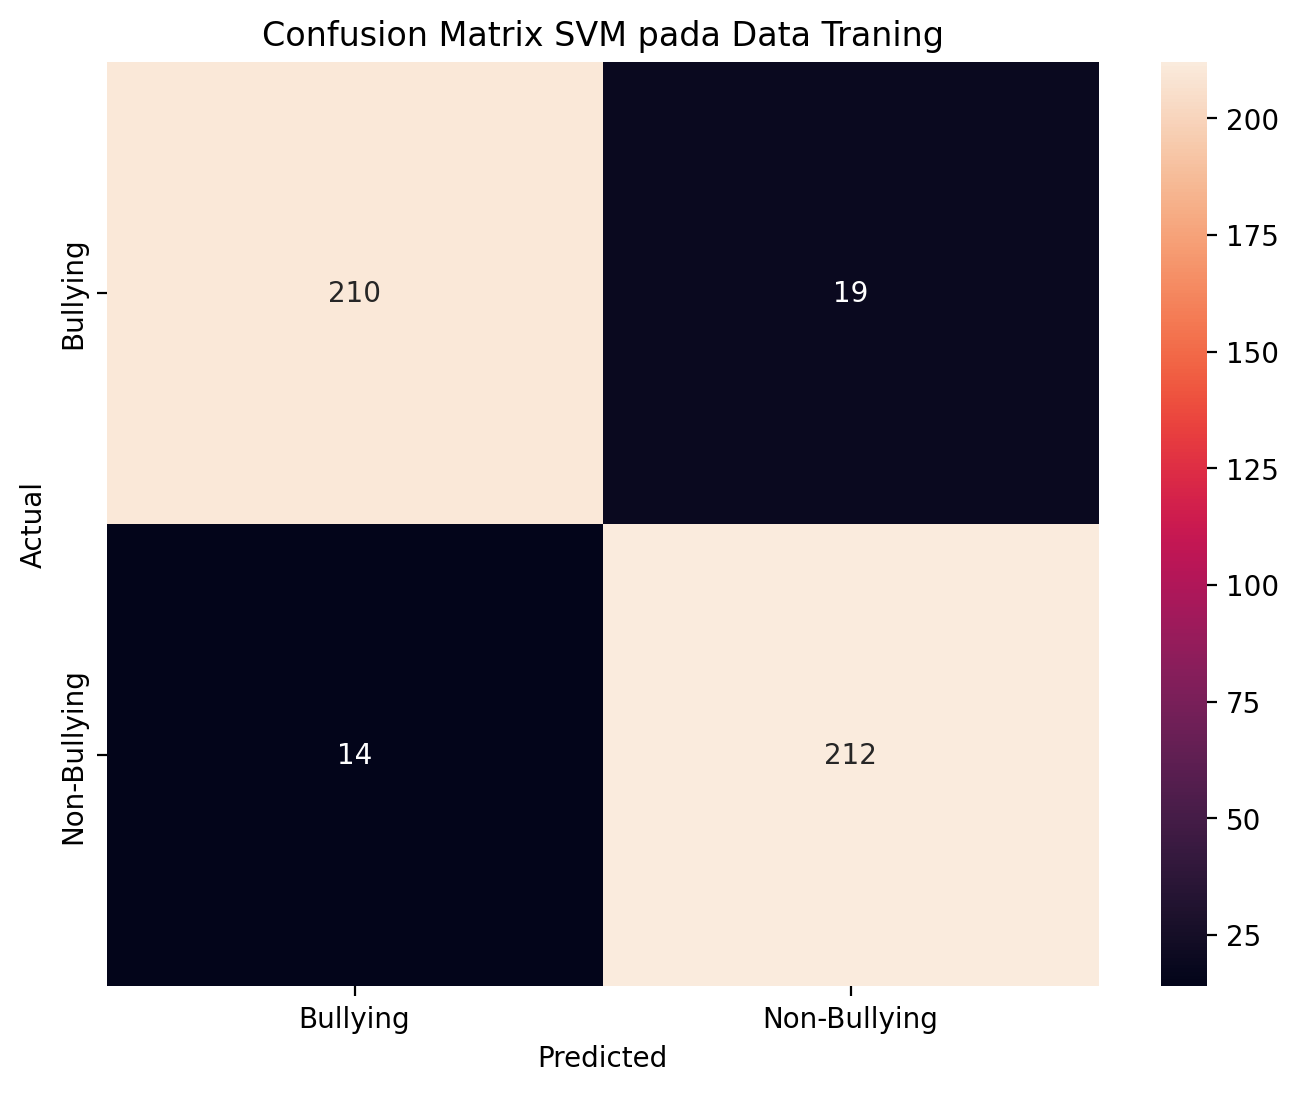

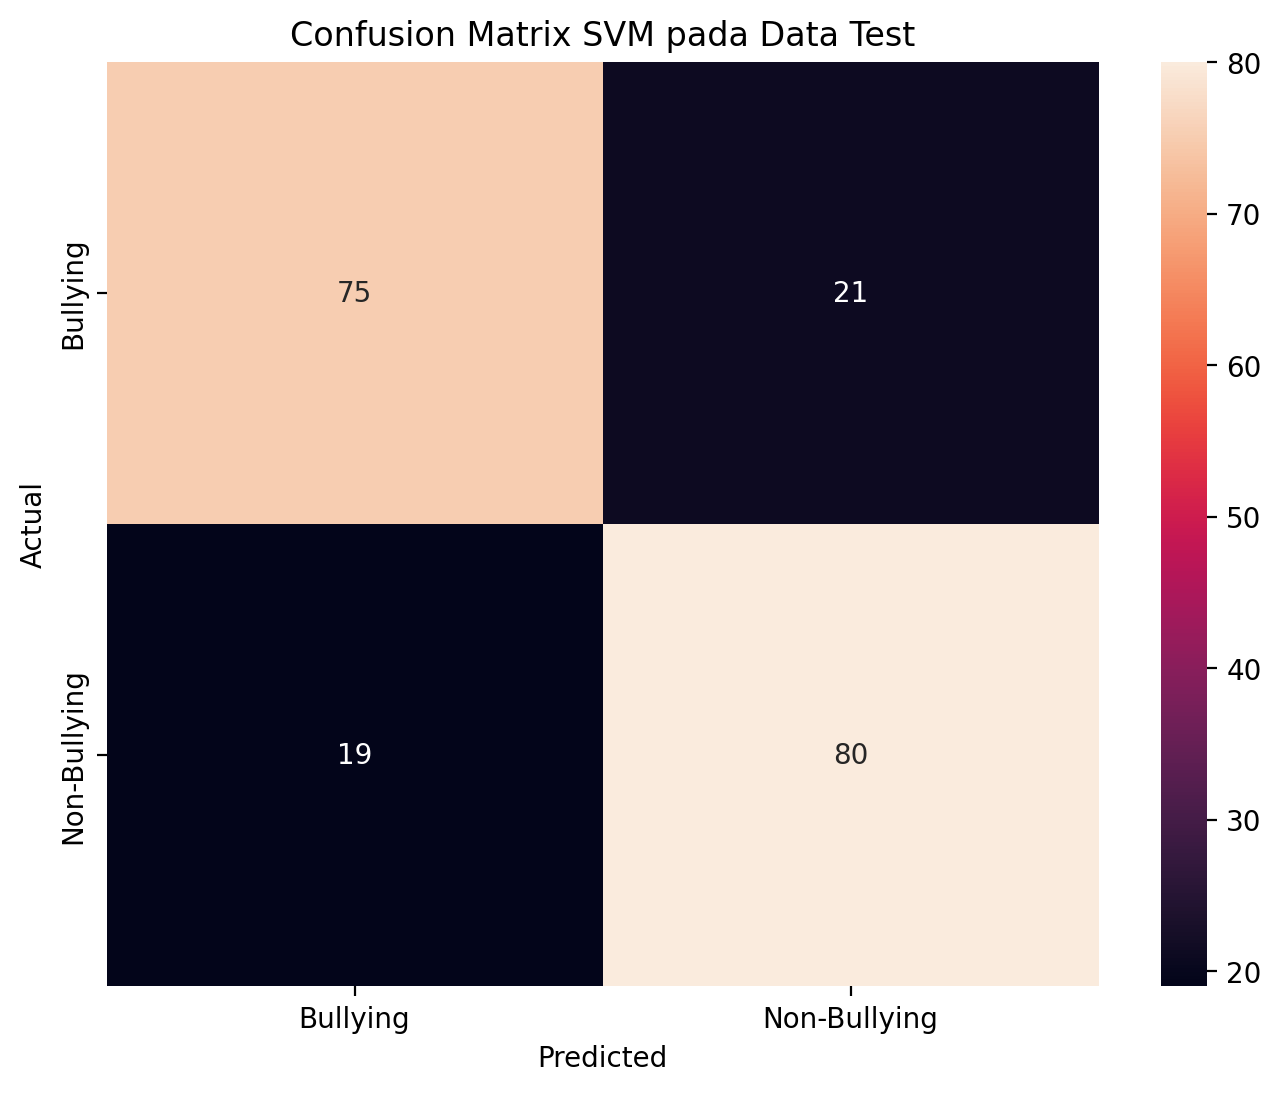

In [ ]:
# Confusion matrix SVM pada data train
conf_matSVM_t = confusion_matrix(Train_Y, predictions_SVM_t)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matSVM = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report SVM pada data training
print("klasifikasi report SVM pada data training")
print(" ")
print(classification_report(Train_Y, predictions_SVM_t))

print(" ")
print(" ")

#klasifikasi report SVM pada data testing
print("klasifikasi report SVM pada data testing")
print(" ")
print(classification_report(Test_Y, predictions_SVM))

klasifikasi report SVM pada data training
 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       229
           1       0.92      0.94      0.93       226

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455

 
 
klasifikasi report SVM pada data testing
 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        96
           1       0.79      0.81      0.80        99

    accuracy                           0.79       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.79      0.79      0.79       195



In [ ]:
#SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.1, kernel='poly', degree=2, gamma=10)
SVM.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Count)
predictions_SVM_t = SVM.predict(Train_X_Count)
#Nilai akurasi
print("SVM Accuracy Score Training-> ",accuracy_score(predictions_SVM_t, Train_Y)*100)
print("SVM Accuracy Score Testing-> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score Training->  100.0
SVM Accuracy Score Testing->  76.92307692307693


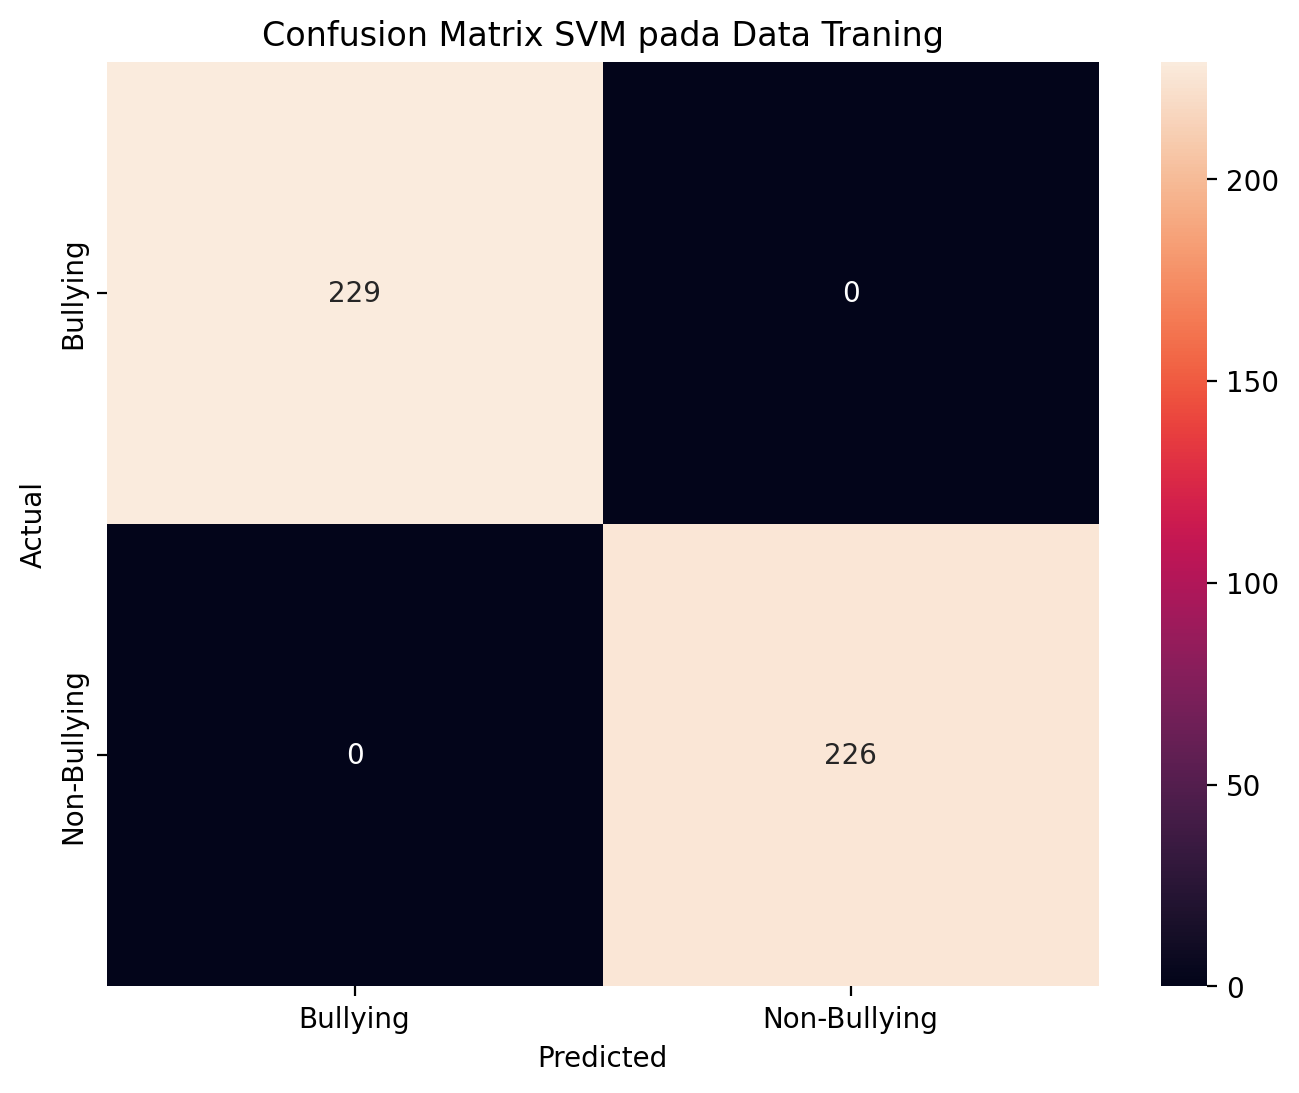

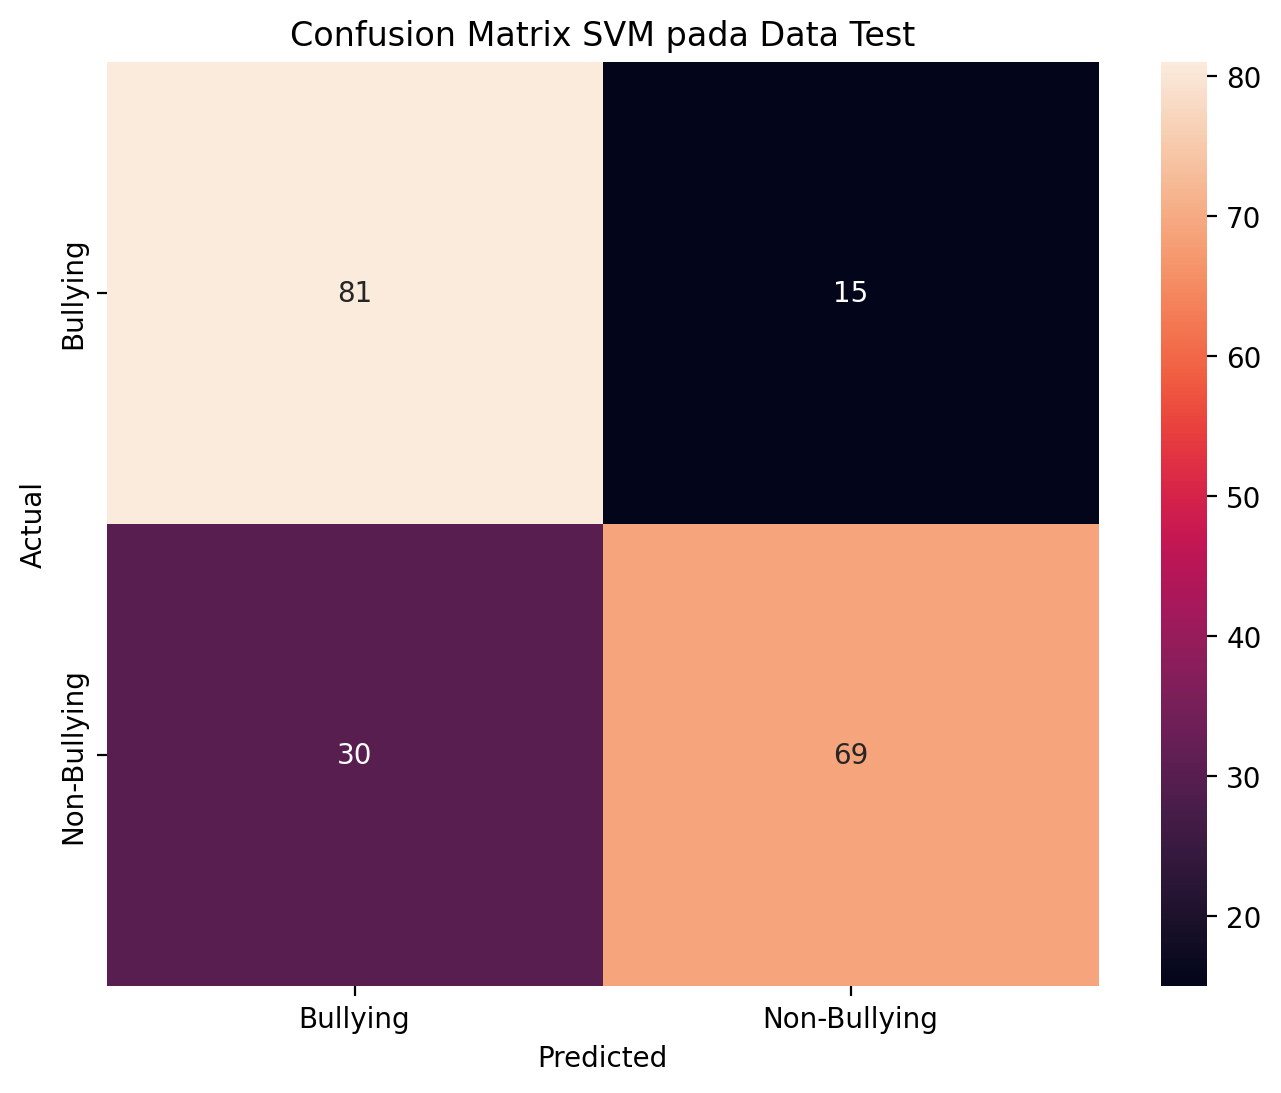

In [ ]:
# Confusion matrix SVM pada data train
conf_matSVM_t = confusion_matrix(Train_Y, predictions_SVM_t)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matSVM = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report SVM pada data training
print("klasifikasi report SVM pada data training")
print(" ")
print(classification_report(Train_Y, predictions_SVM_t))

print(" ")
print(" ")

#klasifikasi report SVM pada data testing
print("klasifikasi report SVM pada data testing")
print(" ")
print(classification_report(Test_Y, predictions_SVM))

klasifikasi report SVM pada data training
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       226

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

 
 
klasifikasi report SVM pada data testing
 
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        96
           1       0.82      0.70      0.75        99

    accuracy                           0.77       195
   macro avg       0.78      0.77      0.77       195
weighted avg       0.78      0.77      0.77       195

